# Neural Network Results Figure
Kai Sandbrink

2024-03-09

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from utils import format_axis

analysis_folder = os.path.join('panels', 'fig_nns')
os.makedirs(analysis_folder, exist_ok=True)

effs = np.arange(0, 1.1, 0.125)

## Panel A: Learning Curves

In [2]:
from settings_anal import pepe_nn_ape_models as ape_models
from settings_anal import pepe_nn_control_models as control_models

ape_modelname = ape_models[0]
control_modelname = control_models[0]

eval_folder = os.path.join('data', 'eval', 'pepe')

### APE MODEL

from settings_anal import pepe_nn_ape_lc_timestamp as eval_timestamp

ape_test_rews = []
ape_test_apes_losses = []
ape_test_returns_losses = []
ape_test_apes_mses = []

for ape_model in ape_models:
    ape_test_rews.append(pickle.load(open(os.path.join(eval_folder, str(ape_model), eval_timestamp + '_test_learning_curve_rews.pkl'), 'rb')))
    ape_test_returns_losses.append(pickle.load(open(os.path.join(eval_folder, str(ape_model), eval_timestamp + '_test_learning_curve_returns_losses.pkl'), 'rb')))
    ape_test_apes_losses.append(pickle.load(open(os.path.join(eval_folder, str(ape_model), eval_timestamp + '_test_learning_curve_apes_losses.pkl'), 'rb')))
    ape_test_apes_mses.append(pickle.load(open(os.path.join(eval_folder, str(ape_model), eval_timestamp + '_test_learning_curve_apes_mses.pkl'), 'rb')))

test_episodes = pickle.load(open(os.path.join(eval_folder, str(ape_modelname), eval_timestamp + '_test_learning_curve_episodes.pkl'), 'rb'))

## average out along efficacy settings
ape_test_rews = np.array(ape_test_rews).mean(axis=2)

## CONTROL MODELS

from settings_anal import pepe_nn_control_lc_timestamp as eval_timestamp

control_test_rews = []
control_test_returns_losses = []

for control_model in control_models:
    control_test_rews.append(pickle.load(open(os.path.join(eval_folder, str(control_model), eval_timestamp + '_test_learning_curve_rews.pkl'), 'rb')))
    control_test_returns_losses.append(pickle.load(open(os.path.join(eval_folder, str(control_model), eval_timestamp + '_test_learning_curve_returns_losses.pkl'), 'rb')))

control_test_rews = np.array(control_test_rews).mean(axis=2)

### IMPORT CURVES FOR EFFICACY AT INPUT
    
from settings_anal import pepe_nn_efficacy_at_input_models as efficacy_at_input_models
from settings_anal import pepe_nn_efficacy_at_input_lc_timestamp as eval_timestamp

efficacy_test_rews = []
efficacy_test_returns_losses = []

for efficacy_model in efficacy_at_input_models:
    efficacy_test_rews.append(pickle.load(open(os.path.join(eval_folder, str(efficacy_model), eval_timestamp + '_test_learning_curve_rews.pkl'), 'rb')))
    efficacy_test_returns_losses.append(pickle.load(open(os.path.join(eval_folder, str(efficacy_model), eval_timestamp + '_test_learning_curve_returns_losses.pkl'), 'rb')))

efficacy_test_rews = np.array(efficacy_test_rews).mean(axis=2)

### IMPORT EXTRA NODE CURVES

from settings_anal import pepe_nn_extra_node_models as extra_nodes_models
from settings_anal import pepe_nn_extra_node_lc_timestamp as eval_timestamp

extra_nodes_test_rews = []
extra_nodes_test_returns_losses = []

for extra_nodes_model in extra_nodes_models:
    extra_nodes_test_rews.append(pickle.load(open(os.path.join(eval_folder, str(extra_nodes_model), eval_timestamp + '_test_learning_curve_rews.pkl'), 'rb')))
    extra_nodes_test_returns_losses.append(pickle.load(open(os.path.join(eval_folder, str(extra_nodes_model), eval_timestamp + '_test_learning_curve_returns_losses.pkl'), 'rb')))

extra_nodes_test_rews = np.array(extra_nodes_test_rews).mean(axis=2)

## SINGLE RUN BASELINES
    
from settings_anal import pepe_nn_baseline_models as baseline_models
from settings_anal import pepe_nn_baseline_lc_timestamp as eval_timestamp

baseline_test_rews = []
baseline_test_returns_losses = []

for ie, efficacy in enumerate(effs):
    baseline_test_rews.append([])
    baseline_test_returns_losses.append([])
    for baseline_model in baseline_models[efficacy]:
        rewards_across_efficacies = np.array(pickle.load(open(os.path.join(eval_folder, str(baseline_model), eval_timestamp + '_test_learning_curve_rews.pkl'), 'rb')))
        print(rewards_across_efficacies.mean(axis=-1))
        print(rewards_across_efficacies.shape)
        baseline_test_rews[-1].append(np.array(pickle.load(open(os.path.join(eval_folder, str(baseline_model), eval_timestamp + '_test_learning_curve_rews.pkl'), 'rb')))[...,ie])
        baseline_test_returns_losses[-1].append(np.array(pickle.load(open(os.path.join(eval_folder, str(baseline_model), eval_timestamp + '_test_learning_curve_returns_losses.pkl'), 'rb')))[...,ie])
        #baseline_test_rews[-1].append(rewards_across_efficacies)

#baseline_test_rews = np.array(baseline_test_rews).mean(axis=0)

## flip to account for conversion from tau to efficacy (reversed order)
baseline_test_rews = np.flip(np.array(baseline_test_rews), axis=0).mean(axis=0)

### THEORY
rews_pomdp = [25,25,25.33,26.12,27.05,28.06,29.13,30.23,31.36]


[16.25044444 17.58422222 17.93444444 18.37888889 18.69455556 18.91455556
 19.83933333 20.229      21.35066667 22.591      22.25655556 22.23611111
 23.17777778 24.27066667 25.10433333 25.06155556 25.65477778 25.162
 26.16455556 26.17888889 25.96688889 25.90877778 26.50577778 25.97333333
 26.36888889 26.07211111 26.44677778 26.54133333 26.73855556 26.63944444
 25.83588889 26.00333333 26.34655556 26.47188889 25.988      26.528
 26.75888889 26.48844444 26.60322222 26.52611111 26.61955556 26.55388889
 26.35377778 26.13788889 26.52577778 26.35166667 26.165      26.19933333
 26.21733333 26.36955556 26.37844444 26.32222222 26.53333333 26.47644444
 26.47488889 26.38733333 26.59322222 26.60866667 26.66444444 26.77833333
 26.56444444 26.85955556 26.62311111 26.54088889 26.60277778 26.52866667
 26.52788889 26.36633333 26.42177778 26.40955556 26.16255556 26.16733333
 26.56611111 26.54433333 26.55333333 26.76988889 26.63222222 26.75611111
 26.77244444 26.47122222 26.33133333 26.39166667 26.41977778 

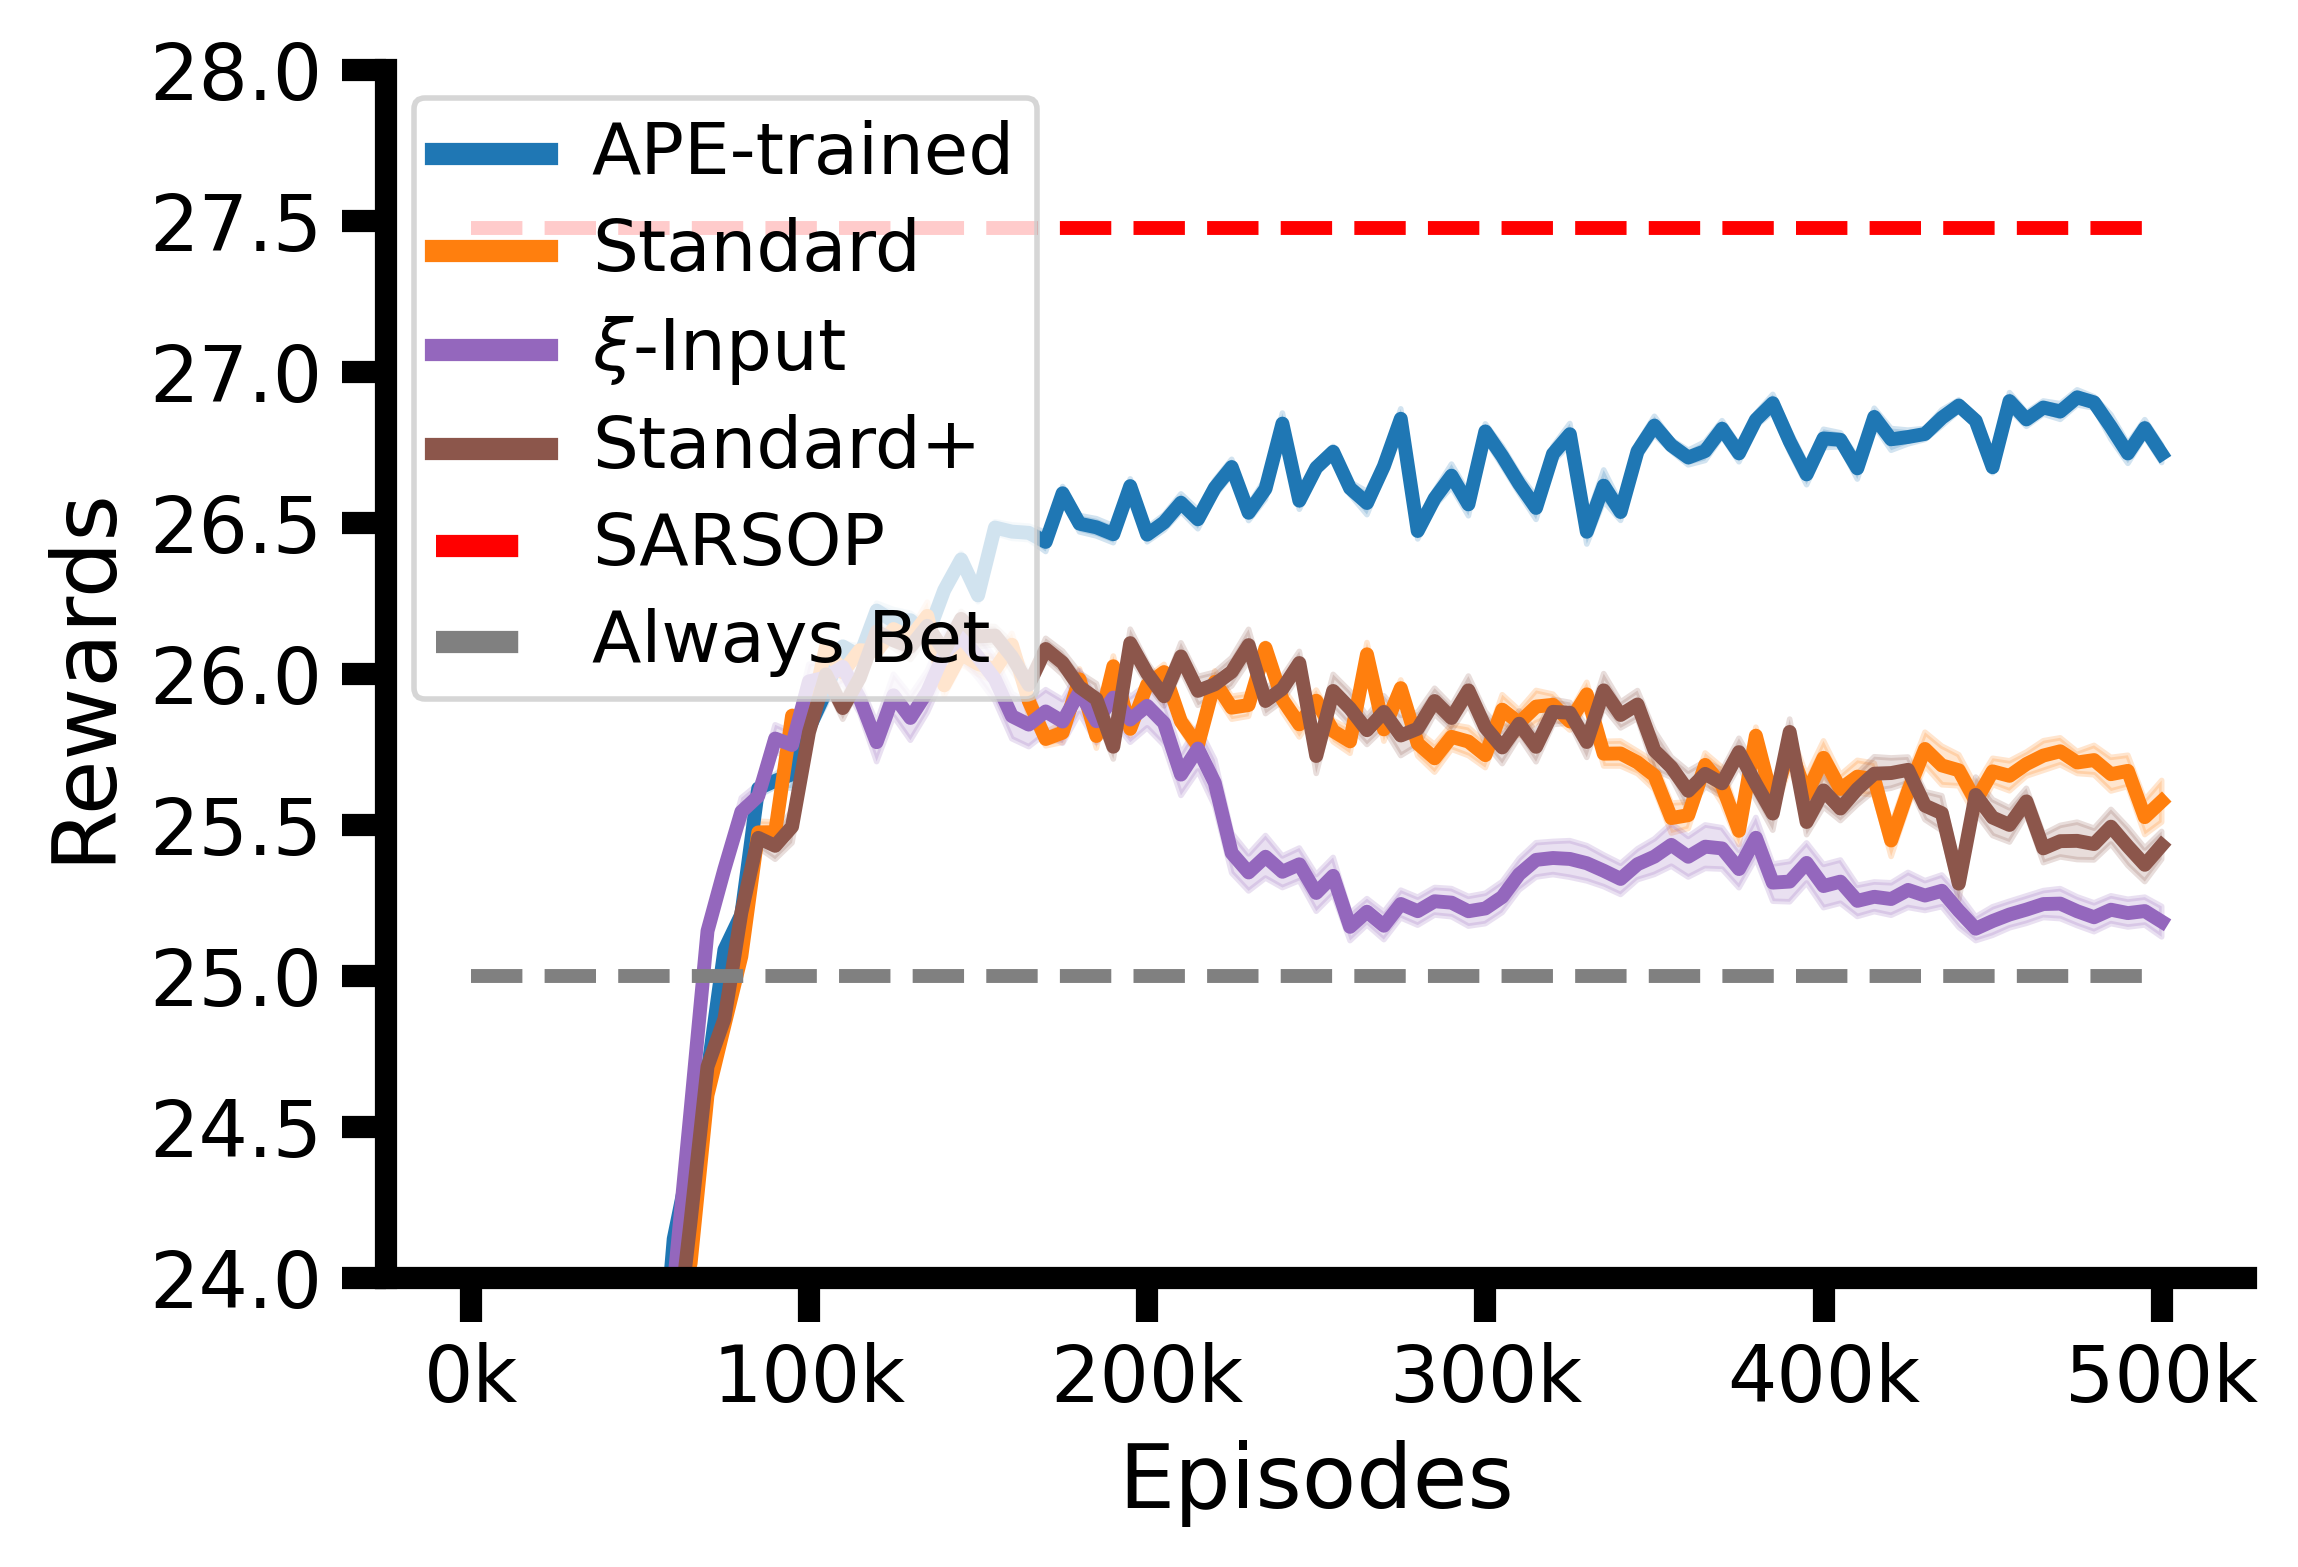

In [5]:
from matplotlib.ticker import FormatStrFormatter
from settings_anal import colors
from settings_anal import names

x_units = 'k'
x_exp = test_episodes
y_exp = ape_test_rews.T
x_control = test_episodes
x_baselines = test_episodes
y_control = control_test_rews.T
y_efficacy_at_input = efficacy_test_rews.T
y_extra_node = extra_nodes_test_rews.T
y_baselines = baseline_test_rews.T

### preprocessing
y_exp = np.array(y_exp)
means_exp = y_exp.mean(axis=1)
stderr_exp = y_exp.std(axis=1)/np.sqrt(len(y_exp))

y_control = np.array(y_control)
means_control = y_control.mean(axis=1)
stderr_control = y_control.std(axis=1)/np.sqrt(len(y_control))

y_efficacy_at_input = np.array(y_efficacy_at_input)
means_at_input = y_efficacy_at_input.mean(axis=1)
stderr_at_input = y_efficacy_at_input.std(axis=1)/np.sqrt(len(y_efficacy_at_input))

y_extra_node = np.array(y_extra_node)
means_extra_node = y_extra_node.mean(axis=1)
stderr_extra_node = y_extra_node.std(axis=1)/np.sqrt(len(y_extra_node))

y_baselines = np.array(y_baselines)
means_baselines = y_baselines.mean(axis=1)
stderr_baselines = y_baselines.std(axis=1)/np.sqrt(len(y_baselines))

y_pomdp = [np.array(rews_pomdp).mean()]*len(x_control)

y_always_bet = [25]*len(x_control)

if y_baselines is not None:
    y_baselines = np.array(y_baselines)
    if len(y_baselines.shape) == 2:
        means_baselines = y_baselines.mean(axis=1)
        stderr_baselines = y_baselines.std(axis=1)/np.sqrt(len(y_baselines))
    else:
        means_baselines = y_baselines
        stderr_baselines = np.zeros_like(means_baselines)

if x_units == 'k':
    x_exp = np.array(x_exp)
    x_exp/=1000

if x_control is not None:
    x_control = np.array(x_control)
    x_control/=1000

if x_baselines is not None:
    x_baselines = np.array(x_baselines)
    x_baselines/=1000

### set up figure
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)    

### plot
ax.plot(x_exp, means_exp, color=colors['ape'], label=names['ape'])
ax.fill_between(x_exp, means_exp - stderr_exp, means_exp + stderr_exp, color=colors['ape'], alpha=0.2)

ax.plot(x_control, means_control, color=colors['noape'], label=names['noape'])
ax.fill_between(x_control, means_control - stderr_control, means_control + stderr_control, color=colors['noape'], alpha=0.2)

# if y_baselines is not None:
#     ax.plot(x_baselines, means_baselines, color='C2', label=names["baselines"])
#     ax.fill_between(x_baselines, means_baselines - stderr_baselines, means_baselines + stderr_baselines, color='C2', alpha=0.2)

ax.plot(x_control, means_at_input, color=colors['efficacy_at_input'], label=names['efficacy_at_input'])
ax.fill_between(x_control, means_at_input - stderr_at_input, means_at_input + stderr_at_input, color=colors['efficacy_at_input'], alpha=0.2)

ax.plot(x_control, means_extra_node, color=colors['extra_node'], label=names['extra_node'])
ax.fill_between(x_control, means_extra_node - stderr_extra_node, means_extra_node + stderr_extra_node, color=colors['extra_node'], alpha=0.2)

ax.plot(x_control, y_pomdp, color='red', label=names['sarsop'], linestyle='--')

ax.plot(x_control, y_always_bet, color='grey', label='Always Bet', linestyle='--')

### format axis
ax.set_xlabel('Episodes')
ax.set_ylabel('Rewards')
#ax.set_title(title)

ax.xaxis.set_major_formatter(FormatStrFormatter('%dk'))

ax.legend(loc='upper left')

ax.set_ylim((24,28))

format_axis(ax)

In [6]:
fig.savefig(os.path.join(analysis_folder, 'learning_curves.png'))
fig.savefig(os.path.join(analysis_folder, 'learning_curves.svg'))

## Panel B: Number of Observes per Episode 

In [10]:
from settings_anal import pepe_nn_ape_models as ape_models
from settings_anal import pepe_nn_control_models as control_models
from settings_anal import pepe_nn_efficacy_at_input_models as efficacy_at_input_models
from utils_project import load_modelrun_files
#from settings_anal import pepe_nn_ape_traj_timestamp as traj_timestamp
from settings_anal import timestamps

traj_base = os.path.join('data', 'eval', 'pepe', )

cmap_apes = mpl.colormaps['Blues']
cmap_controls = mpl.colormaps['Oranges']
test_taus = np.arange(0, 1.1, 0.125)

# rewss_taus_ape, counterss_peeks_taus_ape, control_errss_taus_ape, trajss_actions_taus_ape, trajss_logits_taus_ape, trajss_ps_taus_ape = load_modelrun_files(ape_models, traj_timestamp, ape=True, traj_base=traj_base)
# rewss_taus_control, counterss_peeks_taus_control, control_errss_taus_control, trajss_actions_taus_control, trajss_logits_taus_control, trajss_ps_taus_control = load_modelrun_files(control_models, traj_timestamp, ape=False, traj_base=traj_base)

rewss_taus_ape, counterss_peeks_taus_ape, control_errss_taus_ape, trajss_actions_taus_ape, trajss_logits_taus_ape, trajss_ps_taus_ape = load_modelrun_files(ape_models, timestamps['pepe_nn_ape_traj'], ape=True, traj_base=traj_base)
rewss_taus_control, counterss_peeks_taus_control, control_errss_taus_control, trajss_actions_taus_control, trajss_logits_taus_control, trajss_ps_taus_control = load_modelrun_files(control_models, timestamps['pepe_nn_ape_traj'], ape=False, traj_base=traj_base)
rewss_taus_efficacy_at_input, counterss_peeks_taus_efficacy_at_input, control_errss_taus_efficacy_at_input, trajss_actions_taus_efficacy_at_input, trajss_logits_taus_efficacy_at_input, trajss_ps_taus_efficacy_at_input = load_modelrun_files(efficacy_at_input_models, timestamps['pepe_nn_efficacy_at_input_traj'], ape=False, traj_base=traj_base)

peeks_pomdp = [0, 0, 0, 0, 4, 5, 5, 6, 7]

peeks_pomdp = np.array([
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [2,	2,	2,	2,	2,	2,	2,	2,	2,	2,	2,	2,	2,	2],
    [3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3,	3],
    [4,	4,	4,  4,	4,	4,	4,	4,	4,	4,	4,	4,	4,	4],
    [4,	4,	4,	4,	4,	4,	4,	4,	4,	4,	4,	4,	4,	4],
    [5,	5,	5,	5,	5,	5,	5,	5,	5,	5,	5,	5,	5,	5],
    [5,	5,	6,	5,	5,	5,	5,	5,	5,	5,	6,	5,	5,	5],
    [6,	6,	5,	5,	6,	5,	6,	6,	6,	6,	6,	5,	5,	6],
]).mean(axis=1)

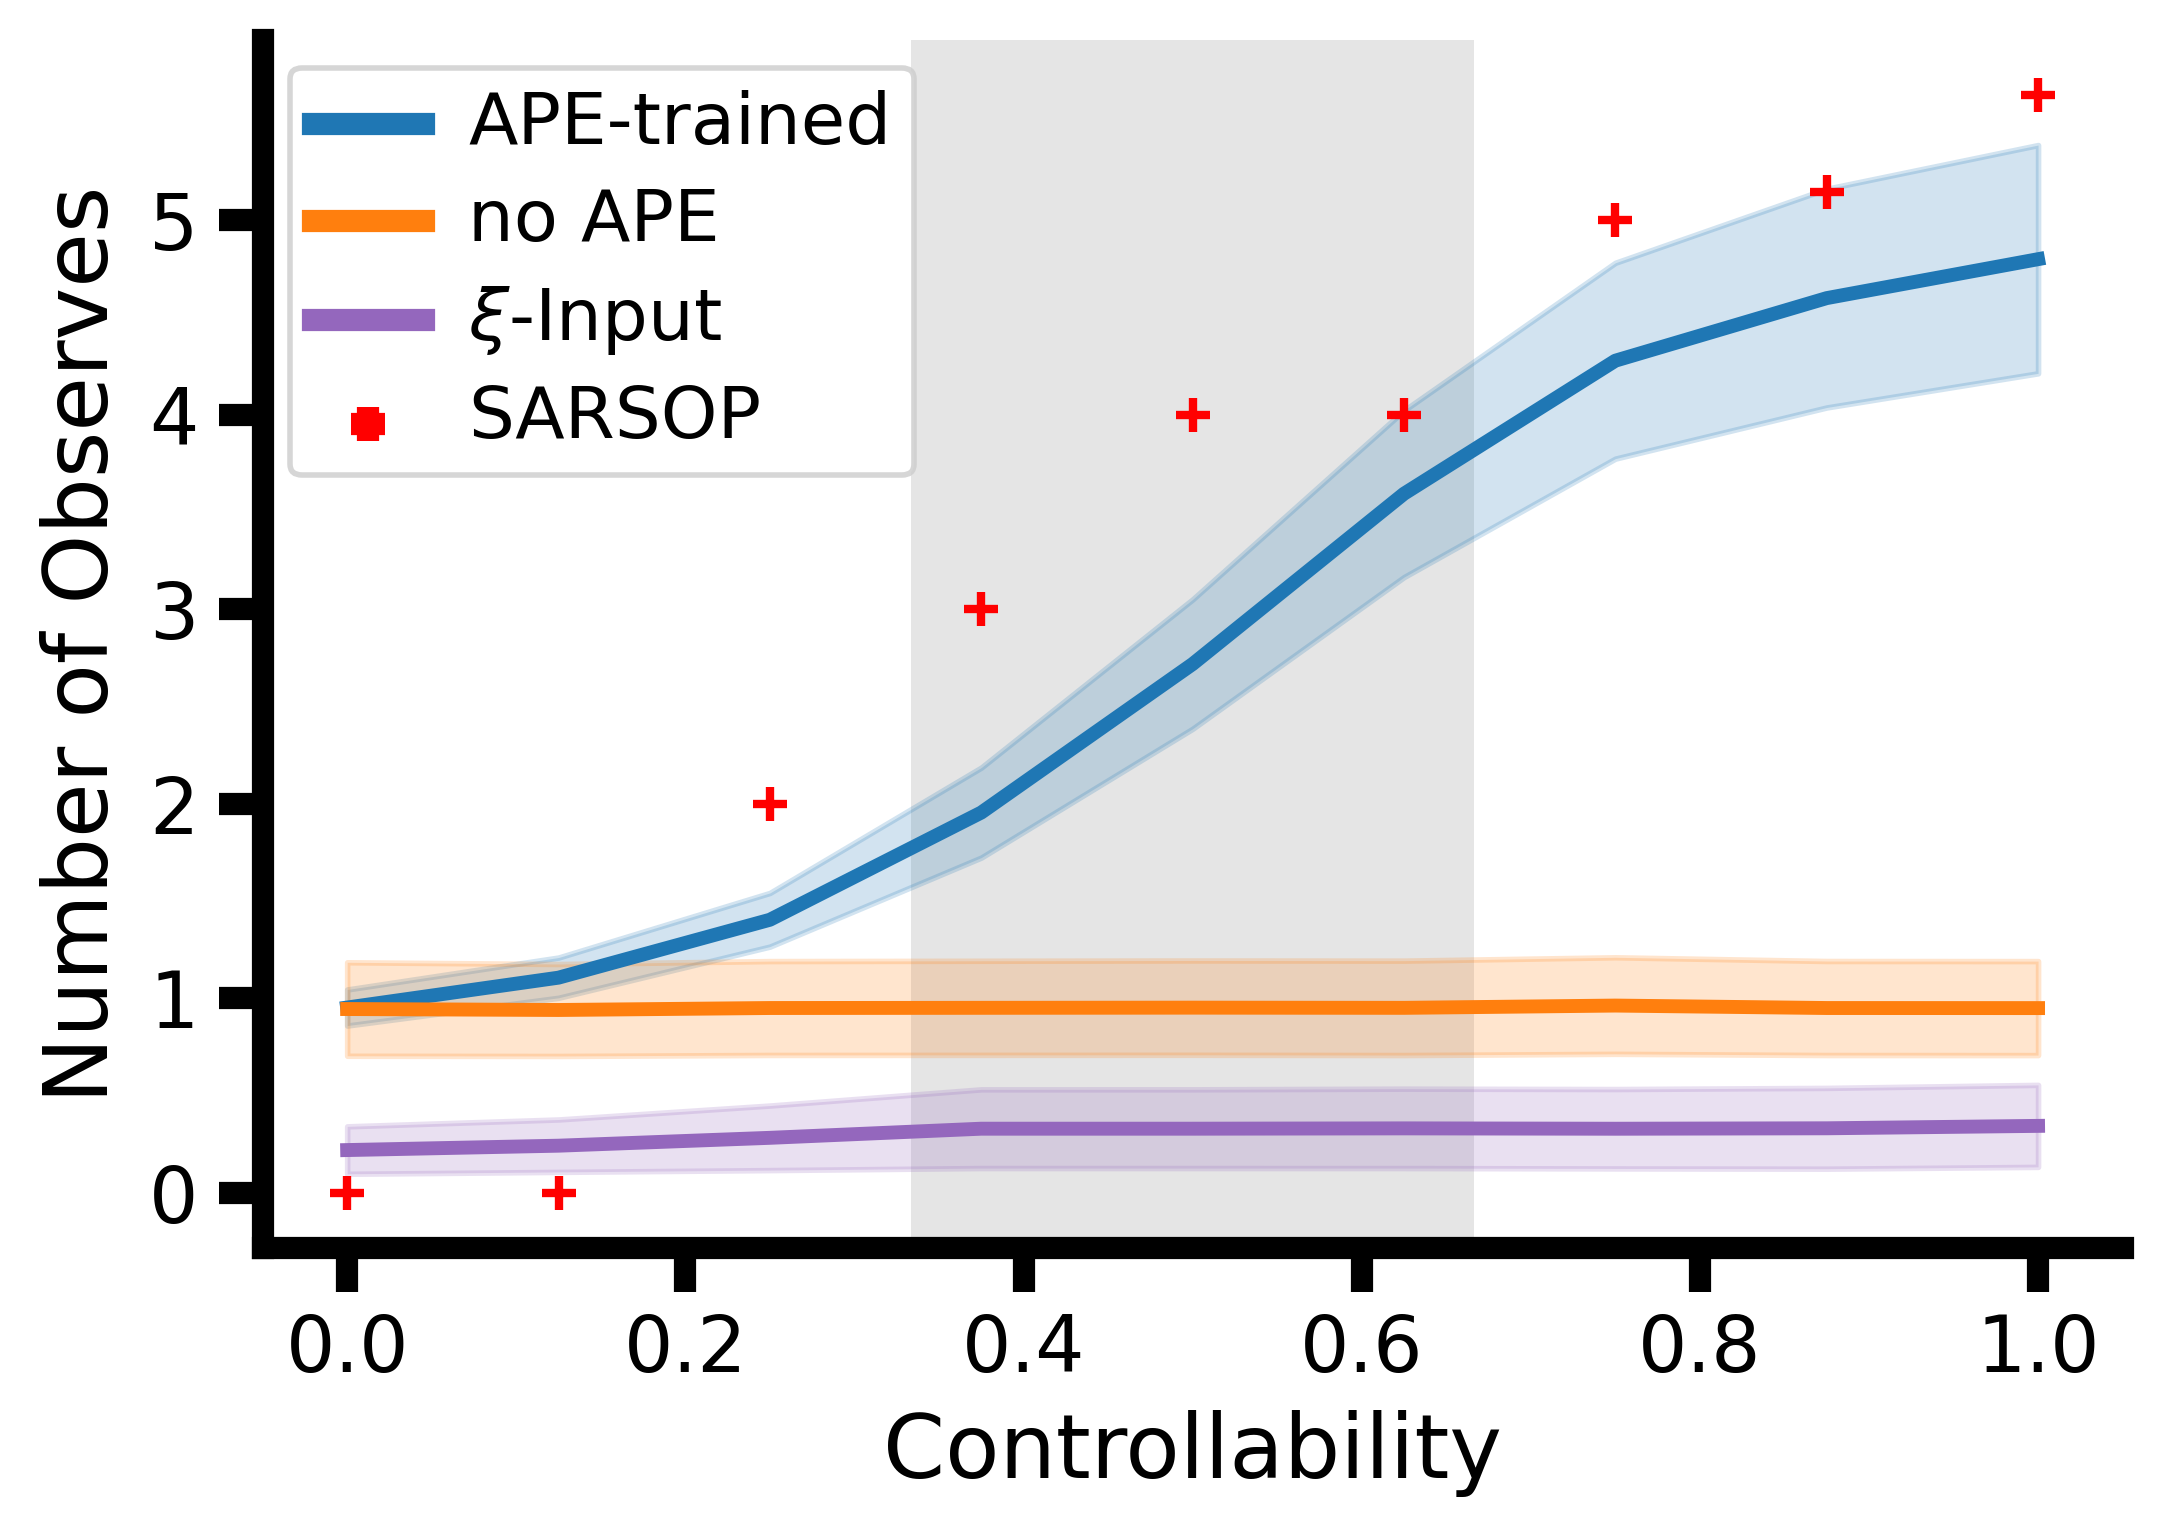

In [11]:
from test_analyses import plot_comparison_curves_several_runs
from settings_anal import colors
from settings_anal import names

fig = plot_comparison_curves_several_runs(test_taus, list(reversed(counterss_peeks_taus_ape)), 
                                          test_taus, list(reversed(counterss_peeks_taus_control)), 
                                          test_taus, list(reversed(counterss_peeks_taus_efficacy_at_input)),
                                          x_theory = test_taus, y_theory = peeks_pomdp, 
                                          label_theory = 'SARSOP', 
                                          axis_xlabel='Controllability', axis_ylabel='Number of Observes', 
                                          label_exp='APE-trained', label_control='no APE',
                                          label_baselines = names['efficacy_at_input'],
                                          shaded_intervals=[(1/3, 2/3)],
                                          color_baselines = colors['efficacy_at_input'])

In [12]:
fig.savefig(os.path.join(analysis_folder, 'observes_across.png'))
fig.savefig(os.path.join(analysis_folder, 'observes_across.svg'))

## Panel C: Rewards Across Episodes

In [13]:
from settings_anal import pepe_nn_ape_models as ape_models
from settings_anal import pepe_nn_control_models as control_models
from utils_project import load_modelrun_files
from settings_anal import pepe_nn_ape_traj_timestamp as traj_timestamp
from settings_anal import pepe_nn_efficacy_at_input_models as efficacy_at_input_models
from settings_anal import timestamps


traj_base = os.path.join('data', 'eval', 'pepe', )

cmap_apes = mpl.colormaps['Blues']
cmap_controls = mpl.colormaps['Oranges']
test_taus = np.arange(0, 1.1, 0.125)

rewss_taus_ape, counterss_peeks_taus_ape, control_errss_taus_ape, trajss_actions_taus_ape, trajss_logits_taus_ape, trajss_ps_taus_ape = load_modelrun_files(ape_models, traj_timestamp, ape=True, traj_base=traj_base)
rewss_taus_control, counterss_peeks_taus_control, control_errss_taus_control, trajss_actions_taus_control, trajss_logits_taus_control, trajss_ps_taus_control = load_modelrun_files(control_models, traj_timestamp, ape=False, traj_base=traj_base)
rewss_taus_efficacy_at_input, counterss_peeks_taus_efficacy_at_input, control_errss_taus_efficacy_at_input, trajss_actions_taus_efficacy_at_input, trajss_logits_taus_efficacy_at_input, trajss_ps_taus_efficacy_at_input = load_modelrun_files(efficacy_at_input_models, timestamps['pepe_nn_efficacy_at_input_traj'], ape=False, traj_base=traj_base)

#rews_pomdp = [25, 25, 25, 25, 25.36, 25.96, 26.66, 27.41, 28.18]
rews_pomdp = [25,25,25.33,26.12,27.05,28.06,29.13,30.23,31.36]


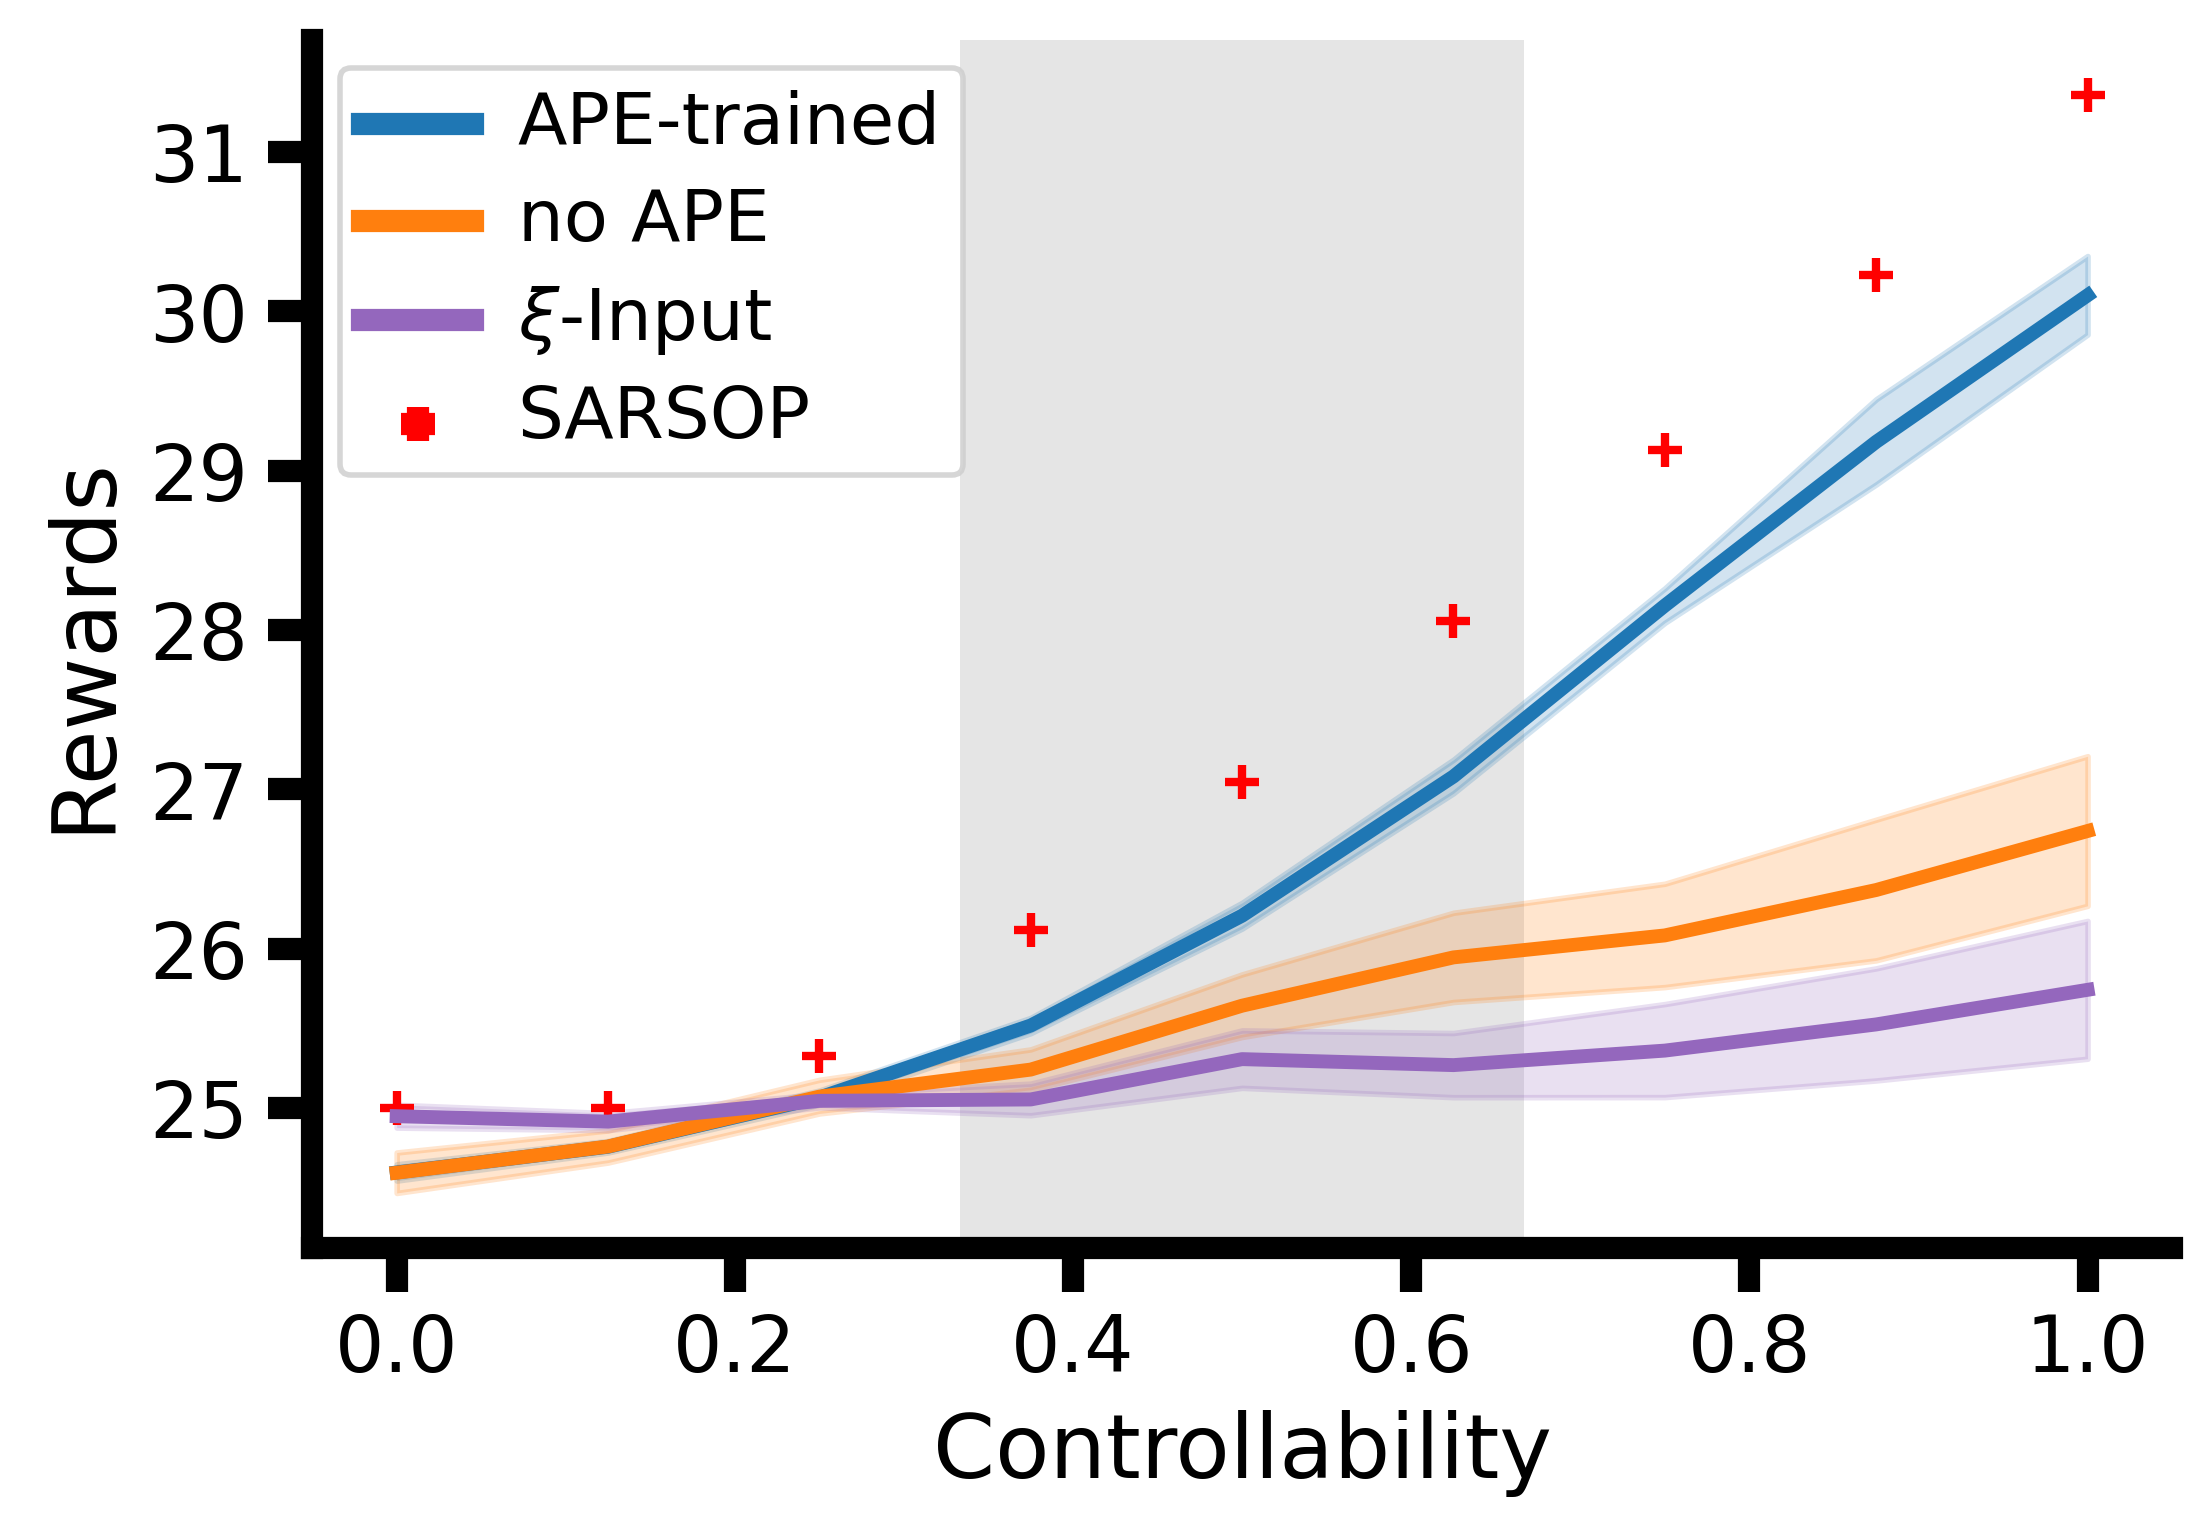

In [14]:
from test_analyses import plot_comparison_curves_several_runs
from settings_anal import colors
from settings_anal import names

fig = plot_comparison_curves_several_runs(test_taus, list(reversed(rewss_taus_ape)), 
                                          test_taus, list(reversed(rewss_taus_control)), 
                                          test_taus, list(reversed(rewss_taus_efficacy_at_input)),
                                          x_theory = test_taus, y_theory = rews_pomdp,
                                            label_theory = 'SARSOP', 
                                            label_baselines = names['efficacy_at_input'],
                                            axis_xlabel='Controllability', axis_ylabel='Rewards', 
                                            label_exp='APE-trained', label_control='no APE',
                                            shaded_intervals=[(1/3, 2/3)],
                                          color_baselines = colors['efficacy_at_input'])

In [15]:
fig.savefig(os.path.join(analysis_folder, 'rewards_across.png'))
fig.savefig(os.path.join(analysis_folder, 'rewards_across.svg'))

## Panel D: Decoding Accuracy

In [16]:
from settings_anal import pepe_nn_ape_models as ape_models
from settings_anal import pepe_nn_control_models as control_models
from settings_anal import pepe_nn_efficacy_at_input_models as efficacy_at_input_models
from settings_anal import pepe_nn_decoding_timestamp as timestamp

decoding_folder = os.path.join('results', 'decoding')

# ape_decoding_train_mses = []
# ape_decoding_test_mses = []
ape_decoding_mses = []
ape_decoding_mses_fc = []
for model in ape_models:
    ape_decoding_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_mses.npy' %timestamp)))
    ape_decoding_mses_fc.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_mses_fc.npy' %timestamp)))
    # ape_decoding_train_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_test_taus_train_mses.npy' %timestamp)))
    # ape_decoding_test_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_test_taus_test_mses.npy' %timestamp)))

ape_decoding_mses = np.array(ape_decoding_mses)
ape_decoding_mses_fc = np.array(ape_decoding_mses_fc)
# ape_decoding_train_mses = np.array(ape_decoding_train_mses)
# ape_decoding_test_mses = np.array(ape_decoding_test_mses)

control_decoding_mses = []
control_decoding_mses_fc = []
for model in control_models:
    control_decoding_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_mses.npy' %timestamp)))
    control_decoding_mses_fc.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_mses_fc.npy' %timestamp)))

control_decoding_mses = np.array(control_decoding_mses)
control_decoding_mses_fc = np.array(control_decoding_mses_fc)

efficacy_at_input_decoding_mses = []
efficacy_at_input_decoding_mses_fc = []
for model in efficacy_at_input_models:
    efficacy_at_input_decoding_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_mses.npy' %timestamp)))
    efficacy_at_input_decoding_mses_fc.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_mses_fc.npy' %timestamp)))

efficacy_at_input_decoding_mses = np.array(efficacy_at_input_decoding_mses)
efficacy_at_input_decoding_mses_fc = np.array(efficacy_at_input_decoding_mses_fc)

## Read in test_episodes
ape_modelname = ape_models[0]
eval_folder = os.path.join('data', 'eval', 'pepe')

from settings_anal import pepe_nn_ape_lc_timestamp as eval_timestamp

ape_test_rews = []
ape_test_apes_losses = []
ape_test_returns_losses = []
ape_test_apes_mses = []

test_episodes = pickle.load(open(os.path.join(eval_folder, str(ape_modelname), eval_timestamp + '_test_learning_curve_episodes.pkl'), 'rb'))


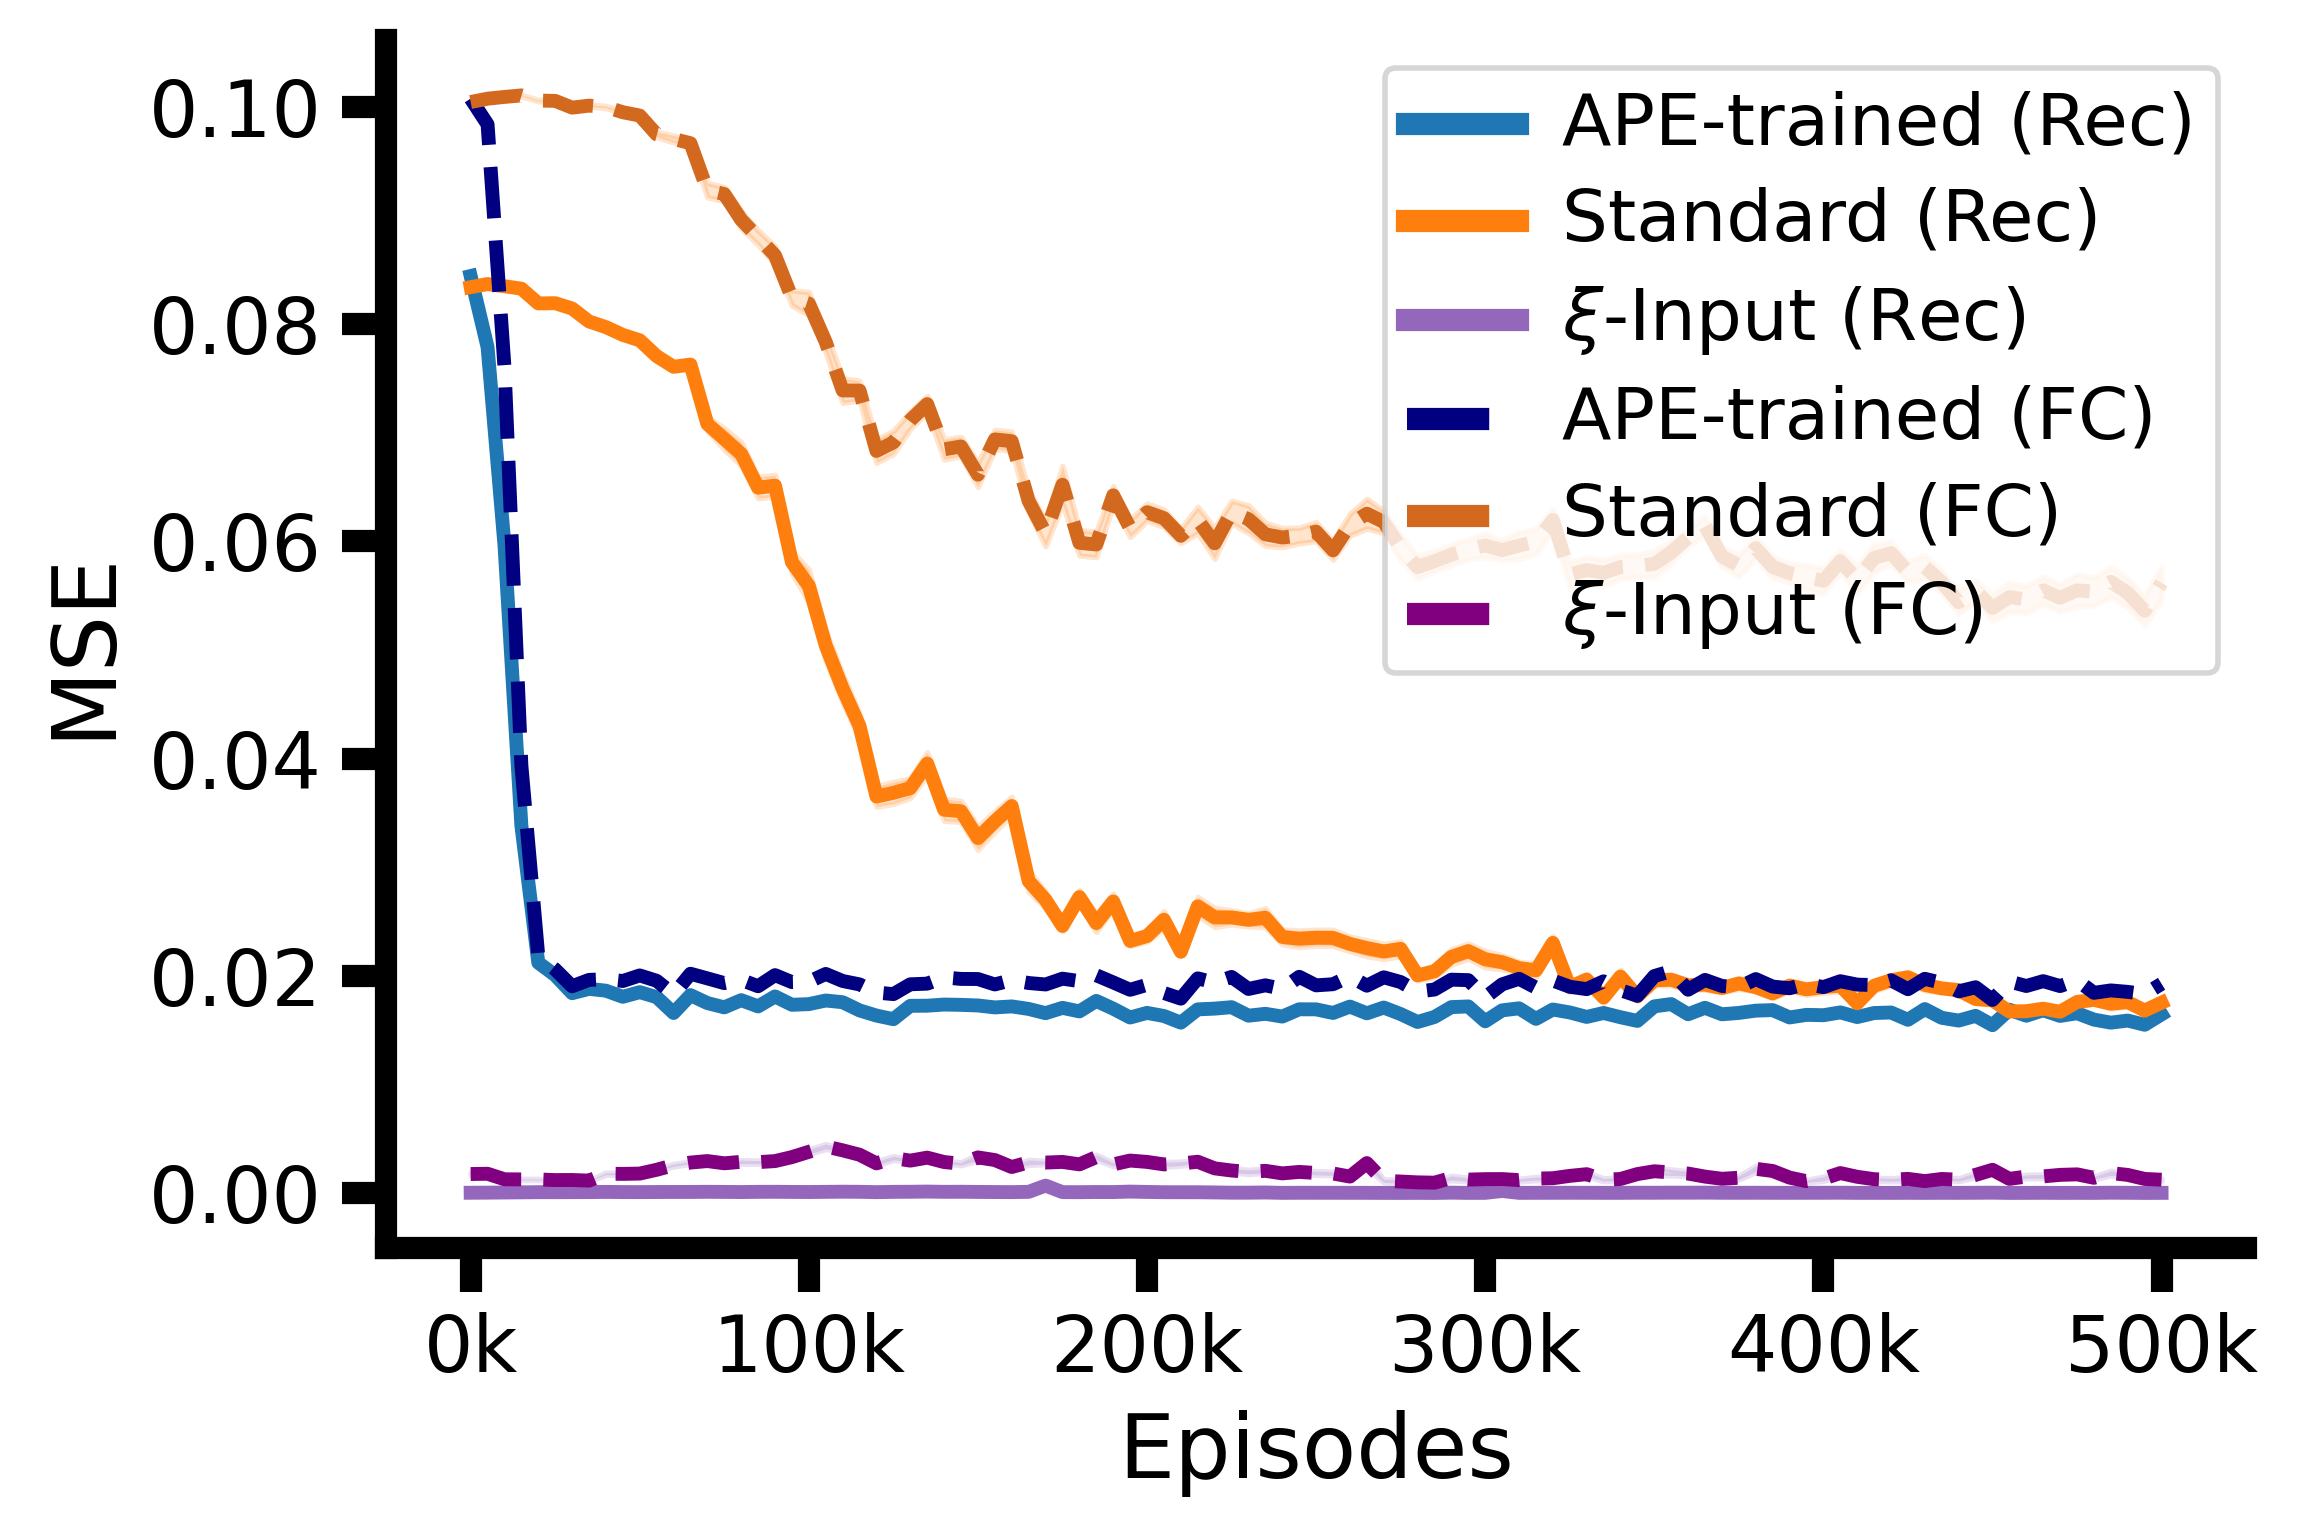

In [17]:
from matplotlib.ticker import FormatStrFormatter
from settings_anal import colors
from settings_anal import names

x_units = 'k'
x_exp = np.array(test_episodes) / 1000

# y_exp_train = ape_decoding_train_mses.T
# means_exp_train = y_exp_train.mean(axis=1)
# stderr_exp_train = y_exp_train.std(axis=1)/np.sqrt(len(y_exp_train))

# y_exp_test = ape_decoding_test_mses.T
# means_exp_test = y_exp_test.mean(axis=1)
# stderr_exp_test = y_exp_test.std(axis=1)/np.sqrt(len(y_exp_test))

y_exp = ape_decoding_mses.T
means_exp = y_exp.mean(axis=1)
stderr_exp = y_exp.std(axis=1)/np.sqrt(len(y_exp))

y_exp_fc = ape_decoding_mses_fc.T
means_exp_fc = y_exp_fc.mean(axis=1)
stderr_exp_fc = y_exp_fc.std(axis=1)/np.sqrt(len(y_exp_fc))

y_control = control_decoding_mses.T
means_control = y_control.mean(axis=1)
stderr_control = y_control.std(axis=1)/np.sqrt(len(y_control))

y_control_fc = control_decoding_mses_fc.T
means_control_fc = y_control_fc.mean(axis=1)
stderr_control_fc = y_control_fc.std(axis=1)/np.sqrt(len(y_control_fc))

y_efficacy_at_input = efficacy_at_input_decoding_mses.T
means_at_input = y_efficacy_at_input.mean(axis=1)
stderr_at_input = y_efficacy_at_input.std(axis=1)/np.sqrt(len(y_efficacy_at_input))

y_efficacy_at_input_fc = efficacy_at_input_decoding_mses_fc.T
means_at_input_fc = y_efficacy_at_input_fc.mean(axis=1)
stderr_at_input_fc = y_efficacy_at_input_fc.std(axis=1)/np.sqrt(len(y_efficacy_at_input_fc))

### set up figure
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)

### plot
ax.plot(x_exp, means_exp, color='C0', label='APE-trained (Rec)')
#ax.plot(x_exp, means_exp, color='C0', label='Rec. APE-trained')
ax.fill_between(x_exp, means_exp - stderr_exp, means_exp + stderr_exp, color='C0', alpha=0.2)


ax.plot(x_exp, means_control, color='C1', label=names['noape'] + " (Rec)")
ax.fill_between(x_exp, means_control - stderr_control, means_control + stderr_control, color='C1', alpha=0.2)


#ax.plot(x_exp, means_at_input, color=colors['efficacy_at_input'], label=names['efficacy_at_input'] + " (Rec)")
ax.plot(x_exp, means_at_input, color=colors['efficacy_at_input'], label=names['efficacy_at_input'] + " (Rec)")
ax.fill_between(x_exp, means_at_input - stderr_at_input, means_at_input + stderr_at_input, color='C4', alpha=0.2)


#ax.plot(x_exp, means_exp_fc, color='navy', label='Fully-Connected', linestyle='dashed',)
ax.plot(x_exp, means_exp_fc, color='navy', label='APE-trained (FC)', linestyle='dashed',)
ax.fill_between(x_exp, means_exp - stderr_exp, means_exp + stderr_exp, color='C0', alpha=0.2)

# ax.plot(x_exp, means_exp_train, color='lightblue', label='APE-trained trained efficacies', linestyle='--')
# ax.fill_between(x_exp, means_exp - stderr_exp, means_exp + stderr_exp, color='lightblue', alpha=0.2)

# ax.plot(x_exp, means_exp_test, color='darkblue', label='APE-trained test efficacies', linestyle='--')
# ax.fill_between(x_exp, means_exp_test - stderr_exp_test, means_exp_test + stderr_exp_test, color='darkblue', alpha=0.2)


ax.plot(x_exp, means_control_fc, color='chocolate', label=names['noape'] + " (FC)", linestyle='dashed',)
ax.fill_between(x_exp, means_control_fc - stderr_control_fc, means_control_fc + stderr_control_fc, color='C1', alpha=0.2)

# if y_baselines is not None:
#     ax.plot(x_baselines, means_baselines, color='C2', label=label_baselines, marker=marker)
#     ax.fill_between(x_baselines, means_baselines - stderr_baselines, means_baselines + stderr_baselines, color='C2', alpha=0.2)

ax.plot(x_exp, means_at_input_fc, color='purple', label=names['efficacy_at_input'] + " (FC)", linestyle='dashed',)
ax.fill_between(x_exp, means_at_input_fc - stderr_at_input_fc, means_at_input_fc + stderr_at_input_fc, color='C4', alpha=0.2)

### format axis
ax.set_xlabel('Episodes')
#ax.set_ylabel('R2 Score')
ax.set_ylabel('MSE')
#ax.set_title(title)

ax.xaxis.set_major_formatter(FormatStrFormatter('%dk'))

ax.legend()

#ax.set_ylim((24,28))

format_axis(ax)


In [18]:
fig.savefig(os.path.join(analysis_folder, 'decoding_curves.png'))
fig.savefig(os.path.join(analysis_folder, 'decoding_curves.svg'))

## Panel E: PCA

In [19]:
base_data_folder = os.path.join('data', 'reps')
reps_folder_suffix = '20240409114335_100cases'

In [20]:
from anal_lowdim import create_pca_2D
from settings_anal import pepe_nn_ape_models as ape_models

model = ape_models[1]

model_data_folder = os.path.join(base_data_folder, str(model), reps_folder_suffix)
checkpoint_str = ''

cell_states = np.load(os.path.join(model_data_folder, 'cell_states%s.npy' %checkpoint_str))
hidden_states = np.load(os.path.join(model_data_folder, 'hidden_states%s.npy' %checkpoint_str))

combined_hidden_states = np.concatenate((cell_states, hidden_states), axis=2)

efficacies = np.load(os.path.join(model_data_folder, 'efficacies%s.npy' %checkpoint_str)).flatten()

ape_pca = create_pca_2D(combined_hidden_states)

[0.28031323 0.19704596]
[1100.43316125  922.62590414]


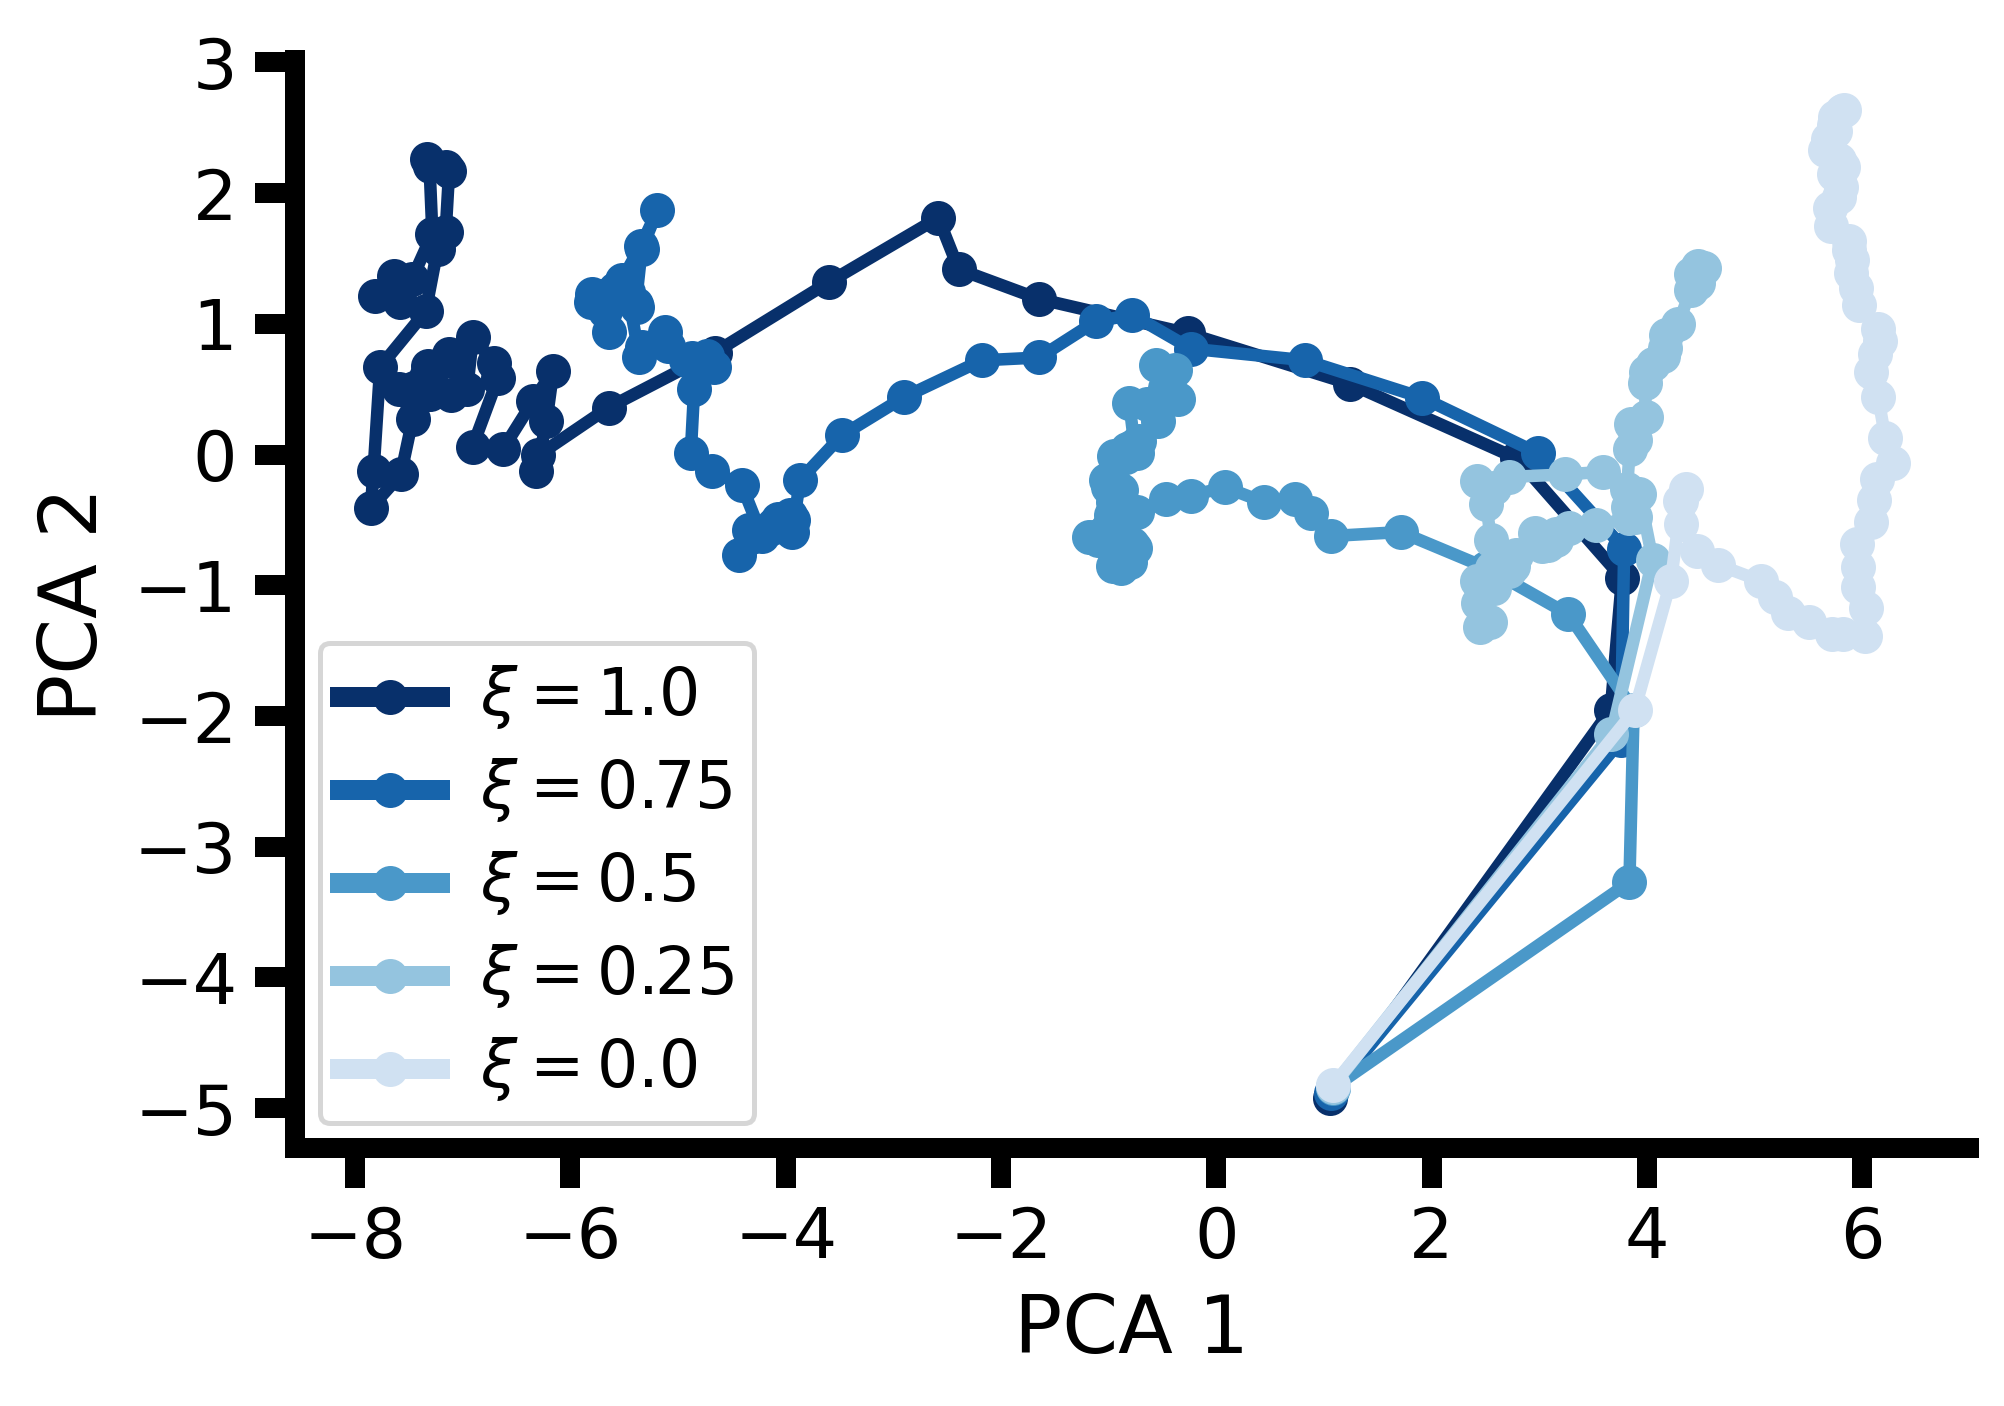

In [21]:
from anal_lowdim import plot_hidden_states_pca, plot_hidden_states_avg

fig = plot_hidden_states_avg(ape_pca, cmap='Blues')

In [22]:
fig.savefig(os.path.join(analysis_folder, 'ape_pca.png'))
fig.savefig(os.path.join(analysis_folder, 'ape_pca.svg'))

In [23]:
from anal_lowdim import create_pca_2D, plot_hidden_states_pca

from settings_anal import pepe_nn_control_models as control_models

base_data_folder = 'data/reps'
reps_folder_suffix = '20240409114335_100cases'

model = control_models[3]

model_data_folder = os.path.join(base_data_folder, str(model), reps_folder_suffix)
checkpoint_str = ''

cell_states = np.load(os.path.join(model_data_folder, 'cell_states%s.npy' %checkpoint_str))
hidden_states = np.load(os.path.join(model_data_folder, 'hidden_states%s.npy' %checkpoint_str))

combined_hidden_states = np.concatenate((cell_states, hidden_states), axis=2)

na_pca = create_pca_2D(combined_hidden_states)

[0.67022905 0.17809464]
[1701.58440584  877.13672626]


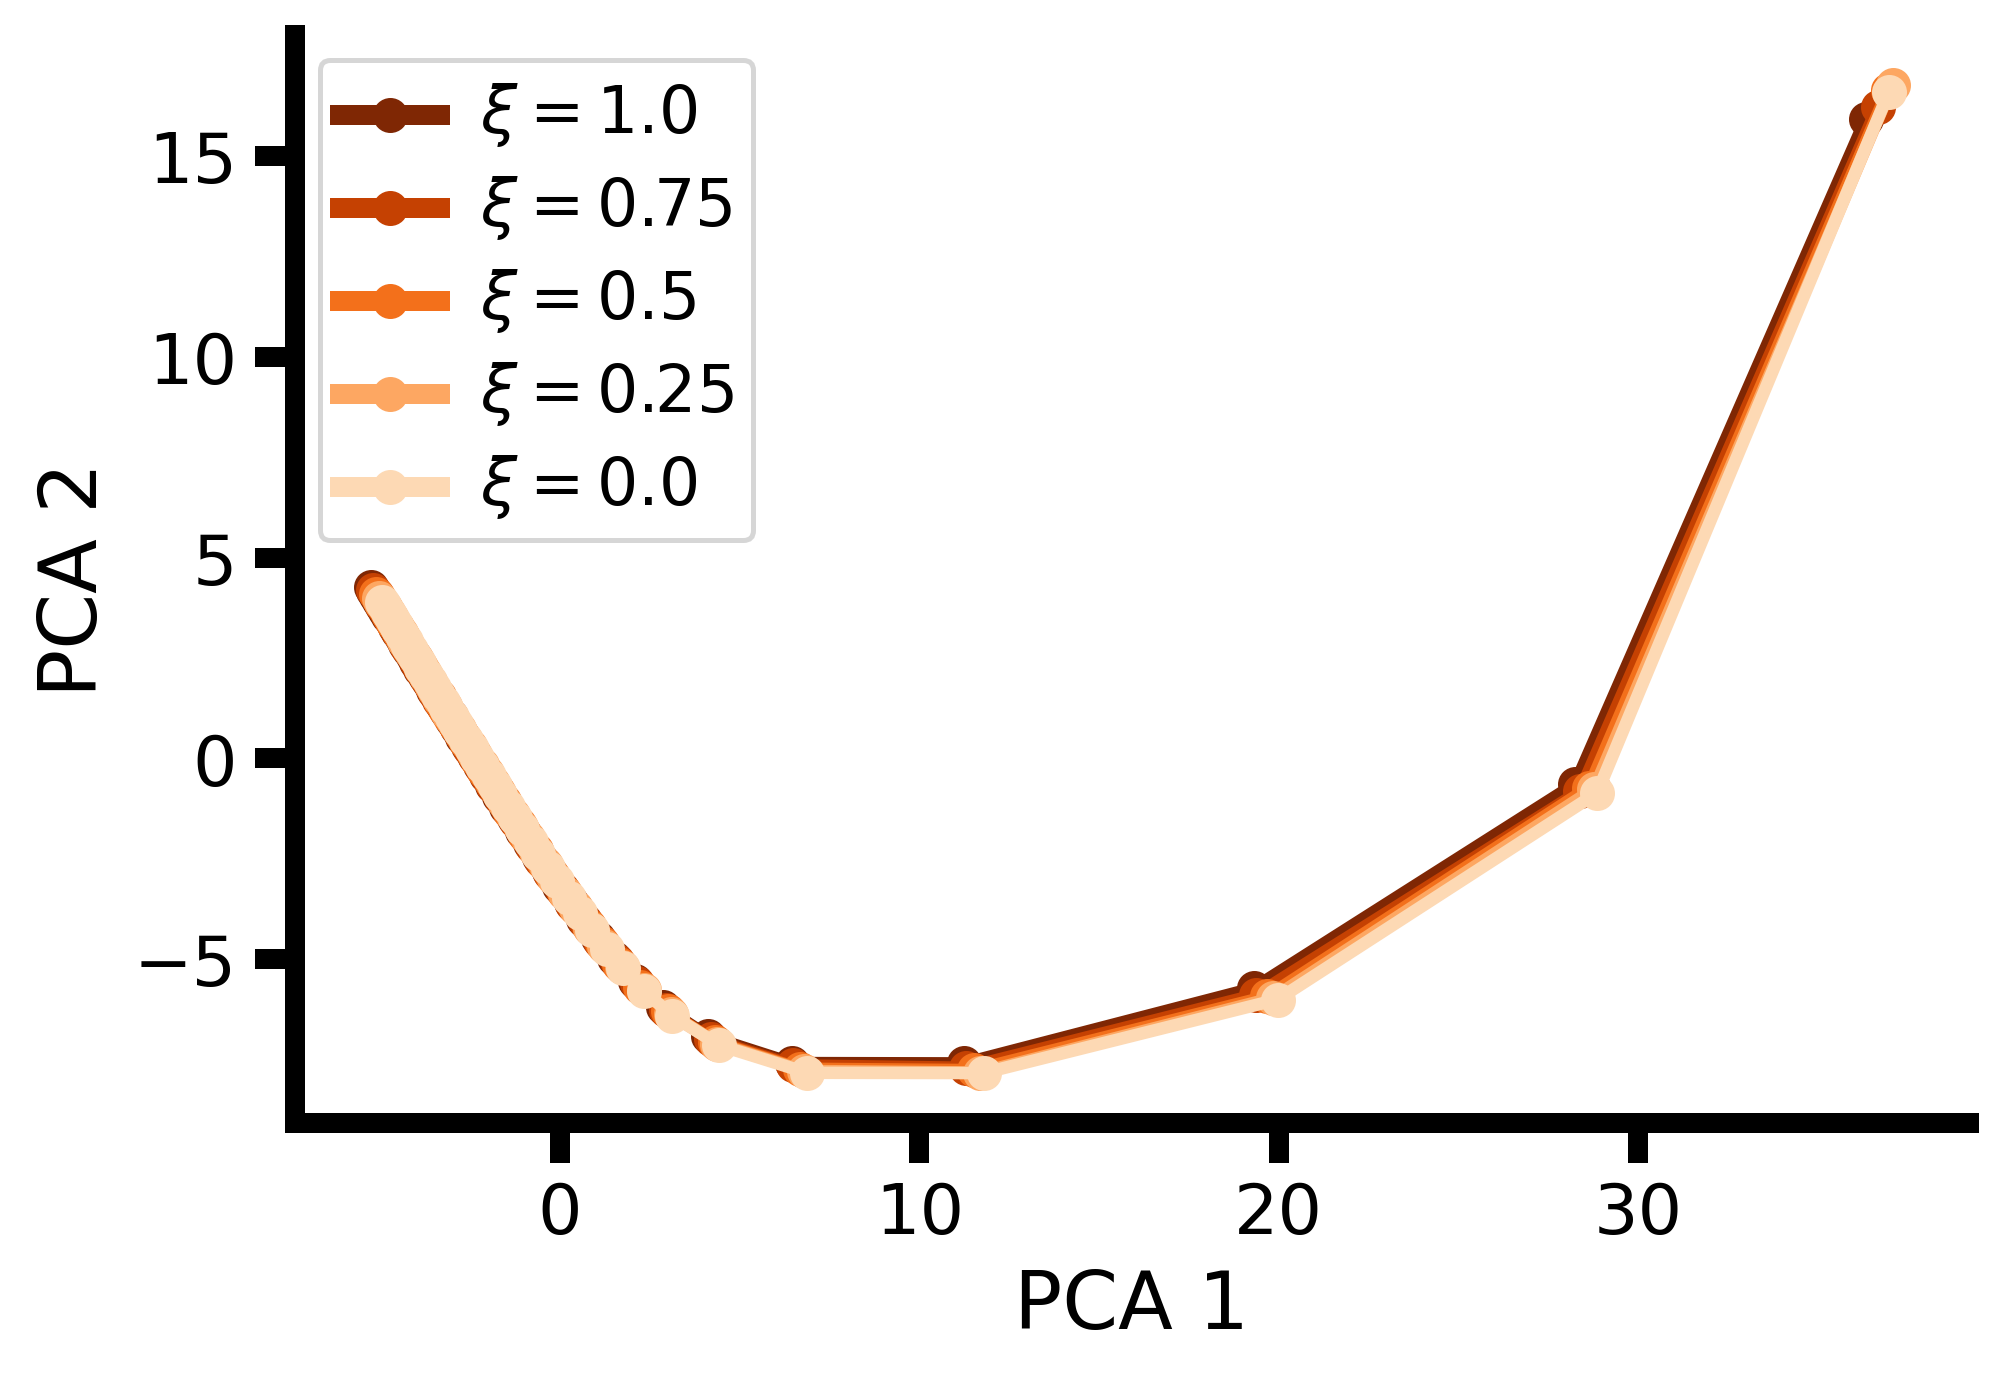

In [24]:
from anal_lowdim import plot_hidden_states_pca, plot_hidden_states_avg

fig = plot_hidden_states_avg(na_pca, cmap='Oranges')

In [25]:
fig.savefig(os.path.join(analysis_folder, 'no_pca.png' ))
fig.savefig(os.path.join(analysis_folder, 'no_pca.svg' ))

### Efficacy-at-input

In [26]:
from anal_lowdim import create_pca_2D, plot_hidden_states_pca

from settings_anal import pepe_nn_efficacy_at_input_models as efficacy_at_input_models

base_data_folder = 'data/reps'
reps_folder_suffix = '20240410155048_100cases'

model = efficacy_at_input_models[2]

model_data_folder = os.path.join(base_data_folder, str(model), reps_folder_suffix)
checkpoint_str = ''

cell_states = np.load(os.path.join(model_data_folder, 'cell_states%s.npy' %checkpoint_str))
hidden_states = np.load(os.path.join(model_data_folder, 'hidden_states%s.npy' %checkpoint_str))

combined_hidden_states = np.concatenate((cell_states, hidden_states), axis=2)

na_pca = create_pca_2D(combined_hidden_states)

[0.59816876 0.13892147]
[1607.51019987  774.68751785]


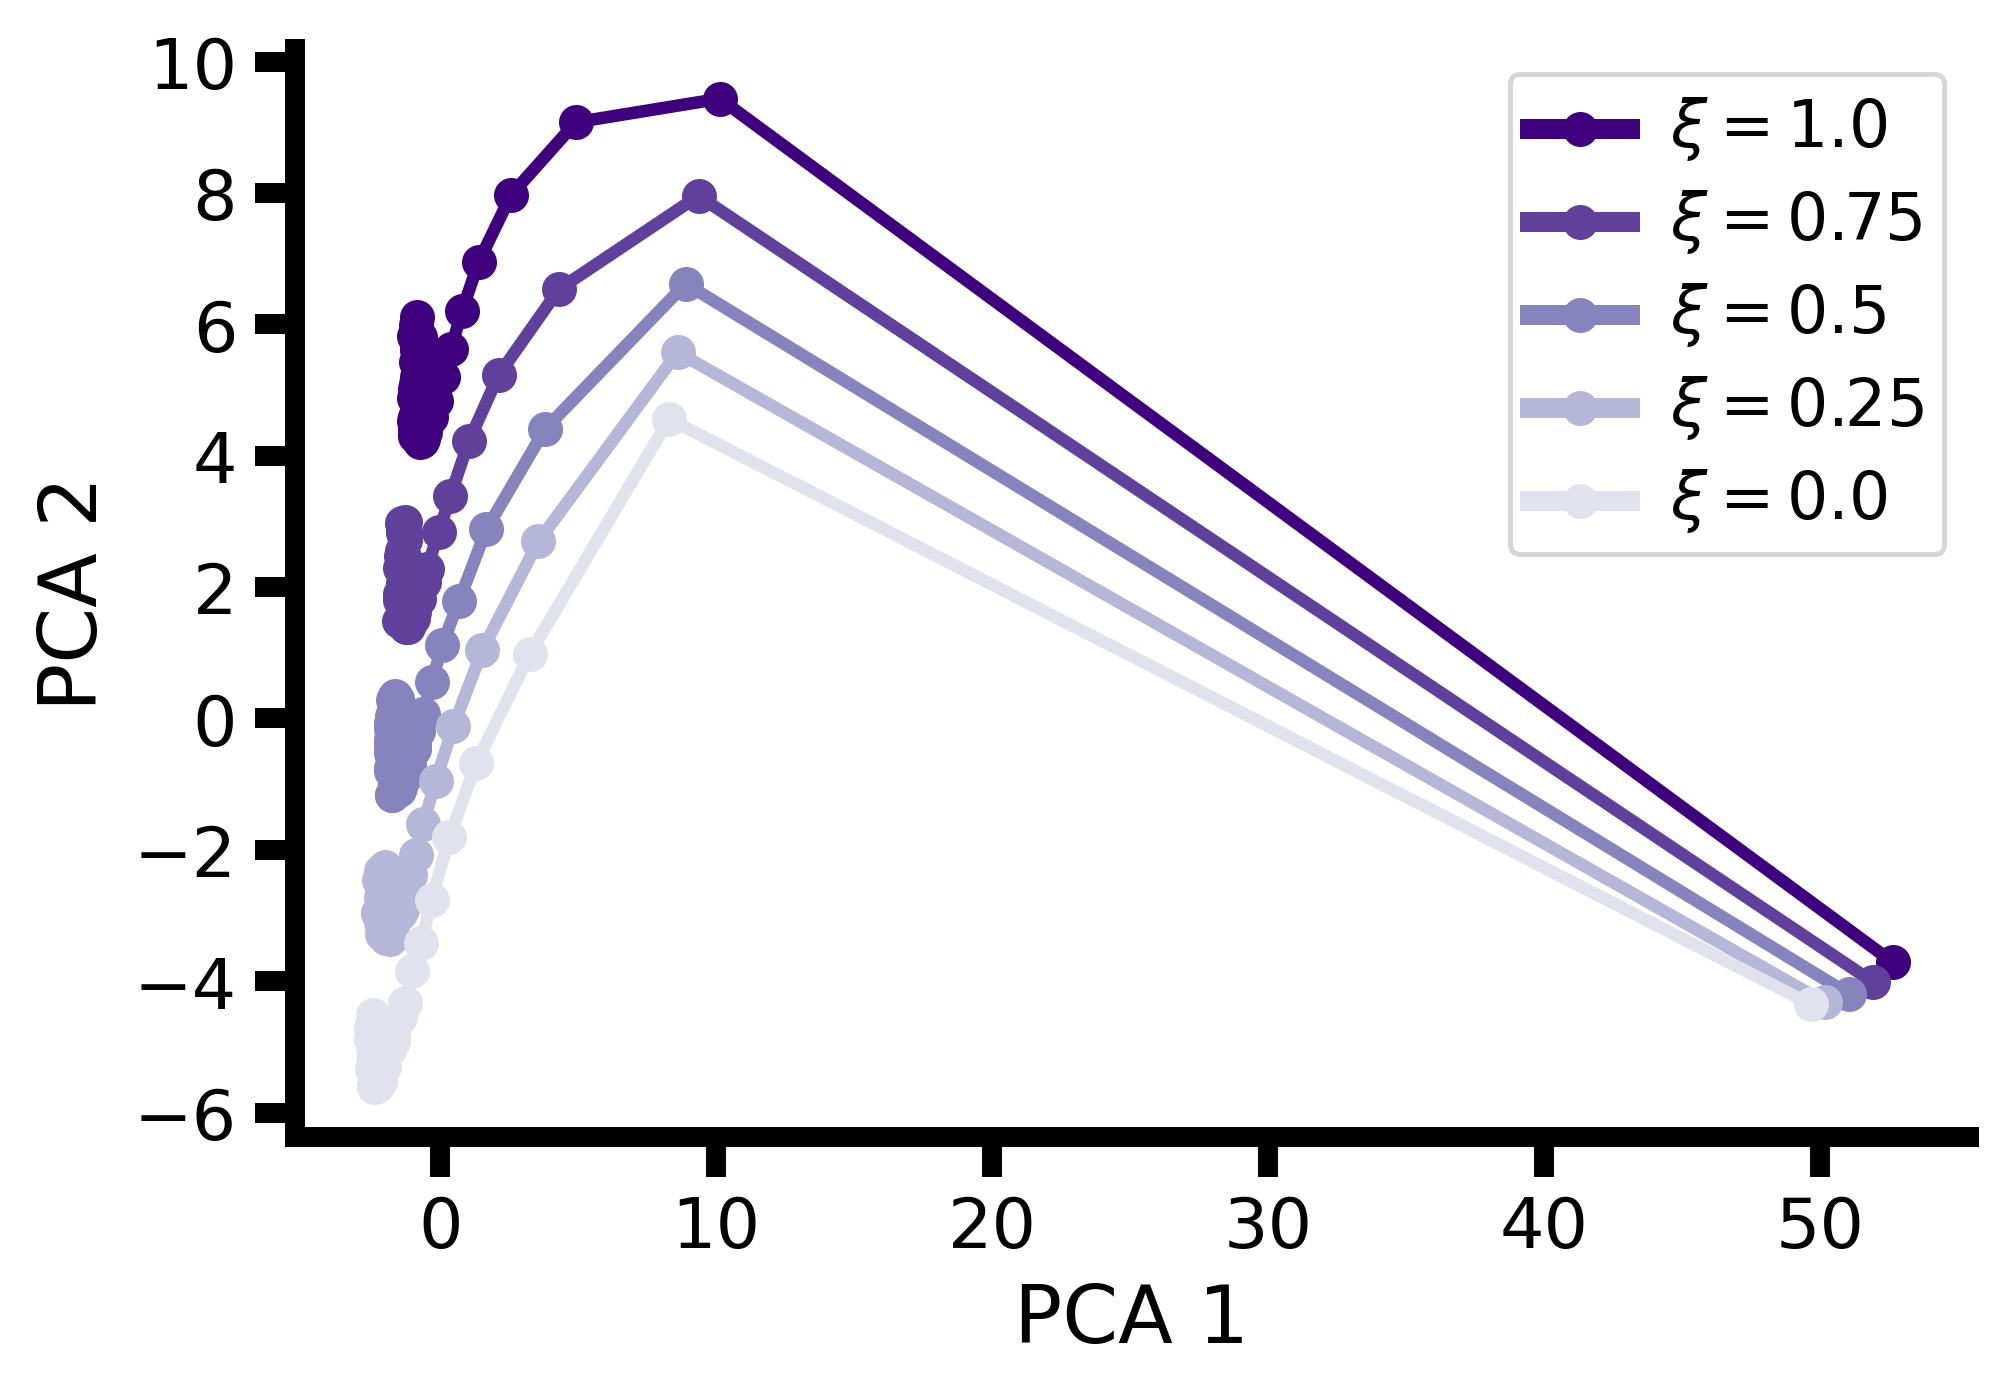

In [27]:
from anal_lowdim import plot_hidden_states_pca, plot_hidden_states_avg

fig = plot_hidden_states_avg(na_pca, cmap='Purples')